## Random Matrix Theory (RMT)

A random matrix is a matrix having all its entries as random variables. Random Matrices are used in many areas where we need to study the statistics of the ensemble. RMT was first developed to model atomic nuclei. 

We consider the matrices whose elements follow the Gaussian/Normal distribution. We call them Gaussian Ensemble. There are 3 types of Gaussian Ensembles:

-  Gaussian Orthogonal Ensemble (GOE)
-  Gaussian Unitary Ensemble (GOE)
-  Gaussian Symplectic Ensemble (GOE)


### Gaussian Orthogonal Ensemble

These consists of $N \times N$ real, symmetric matrices whose elements follow the Normal distribution.
For example, if $H$ be such a $N \times N$ matrix, then $X_{ij} \sim Normal(0,1) \ \forall \ i,j \leq N$ 

In [65]:
using Plots
using LinearAlgebra
using Random
using Distributions
using StatsPlots

In [66]:
#Defining a function to generate eigenvalues of a GOE matrix
function H_GOE()
    H=zeros(8,8);
    for i = 1 : 8
        for j = 1 : 8
            H[i,j]=randn() #assigning normally distributed entries to H
        end
    end
    #Making a symmetric matrix from H
    Hs=(H+H')/2;
    p=eigvals(Hs)
        p
    end

H_GOE (generic function with 1 method)

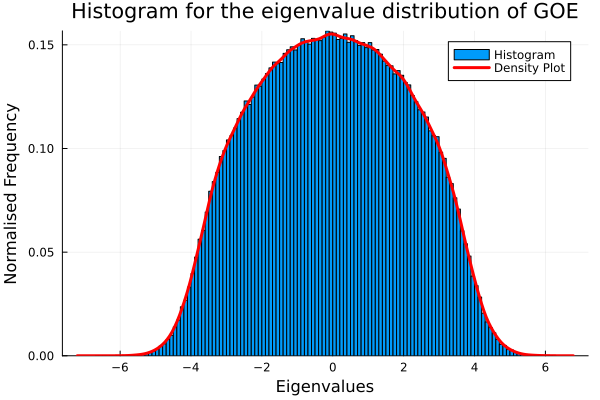

In [94]:
l=[]
for i = 1:50000
    q= H_GOE()
    for j in q 
        append!(l,j)
    end
end
histogram(l, norm=true,title="Histogram for the eigenvalue distribution of GOE", label="Histogram")
density!(l, norm=true, lw=3, color="red",xlabel="Eigenvalues", ylabel="Normalised Frequency", label="Density Plot")

### Gaussian Unitary Ensemble

These consists of $N \times N$ Hermitian matrices whose elements follow the complex Normal distribution.
For example, if $H$ be such a $N \times N$ matrix, then $X_{ij} \sim Normal(0,1) + \mathrm{i}\ Normal(0,1)\ \forall \ i,j \leq N$ 

In [68]:
#Defining a function to generate eigenvalues of a GUE matrix
function H_GUE()
    H=complex(zeros(8,8));
    for i = 1 : 8
        for j = 1 : 8
            H[i,j]=rand(Normal(0,1))+ rand(Normal(0,1))im
        end
    end
    #Making a hermitian matrix from H
    Hs=(H+H')/2
    p=eigvals(Hs)
        p
    end

H_GUE (generic function with 1 method)

In [69]:
l1=[]
for i = 1:50000
    q= H_GUE()
    for j in q 
        append!(l1,j)
    end
end

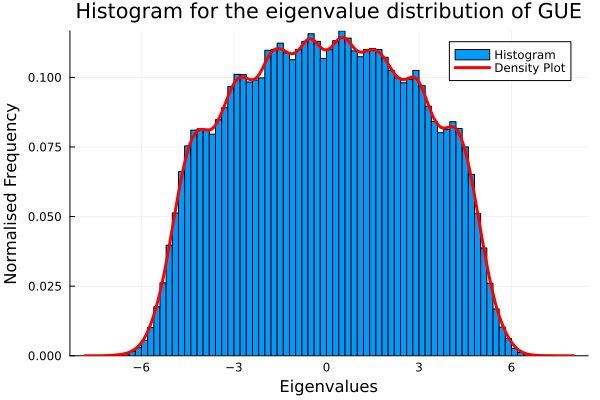

In [95]:
histogram(l1, norm=true, title="Histogram for the eigenvalue distribution of GUE", label="Histogram")
density!(l1, norm=true, lw=3, color="red",xlabel="Eigenvalues", ylabel="Normalised Frequency", label="Density Plot")

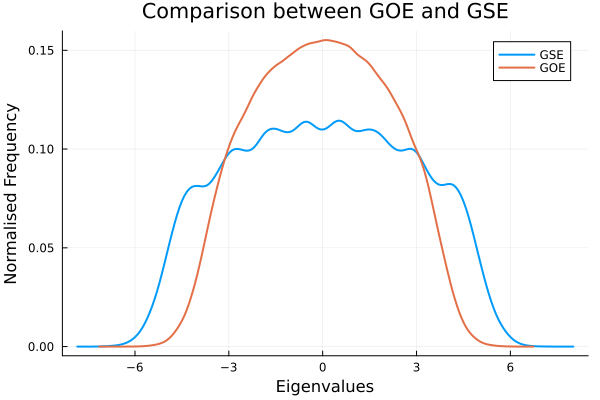

In [71]:

density(l1, norm=true, lw=2, label="GSE", xlabel="Eigenvalues", ylabel="Normalised Frequency")
density!(l, norm=true, lw=2,label="GOE", title="Comparison between GOE and GSE")

We see that the graphs of the density of the eigenvalues are somewhat are semi-circular shaped. Thus, this follows Wigner's semi-circular distribution after proper normalisation of the eigenvalues

### Wigner's Surmise

RMT theory was developed to study the nuclei of heavy atoms, having many degrees of freedom. Since it was difficult to study each degree of freedom individually, the ensemble, consisting of random matrices, was studied. The distribution of eigenvalue spacing (which represented the energy difference) was calculated that took a particular form.

Here were estimate the spacing distribution for a $2 \times 2$ symmetric matrix whose elements follow the Normal distribution.

$$H=\begin{pmatrix}
x_1 & x_3 \\
x_3 & x_2
\end{pmatrix}$$

where, 

$X_1, X_2 \sim Normal(0,1)$

$X_3 \sim Normal(0,\frac{1}{2})$

In [44]:
function Ham()
    x1,x2=randn(2)
    x3=rand(Normal(0,0.5))
    H=[x1 x3;x3 x2]
    p,q=eigvals(H)
    p,q
    end

Ham (generic function with 1 method)

In [56]:
l3=[]
for i=1:50000
        a1,a2=Ham()
    append!(l3,abs(a1-a2))
    end

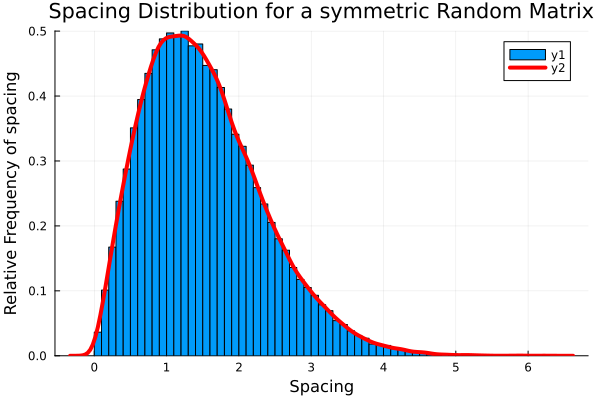

In [92]:
histogram(l3, bins=100, norm=true)
density!(l3, lw=4, color="red", norm=true, xlabel="Spacing", ylabel="Relative Frequency of spacing", title="Spacing Distribution for a symmetric Random Matrix")

This follows a curve of the form $xe^{-x^2}$. 

Thus, we see that if the spacing is close to 0, the frequency is also close to 0. Thus, the probability of finding two eigenvalues of very close spacing is close to 0. This is called 'eigenvalue repulsion' which states that it is highly unlikely to obtain two eigenvalues close to each other, if the random matrix elements for the normal distribution.